# Zillow CSV ETL process

In [139]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [140]:
#Replace with relevant report csv
sfr_csv = Path("Resources/Sales_count_sfr.csv")

In [141]:
#Read csv and preview df
single_family_df = pd.read_csv(sfr_csv)
single_family_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,102001,0,United States,country,NaN,33875.0,33287.0,42598.0,37571.0,39897.0,...,35946.0,23641.0,30239.0,41435.0,36483.0,41445.0,40799.0,32796.0,35729.0,32325.0
1,394913,1,"New York, NY",msa,NY,380.0,311.0,375.0,349.0,379.0,...,299.0,214.0,239.0,305.0,246.0,334.0,342.0,253.0,327.0,268.0
2,753899,2,"Los Angeles, CA",msa,CA,270.0,241.0,421.0,300.0,320.0,...,150.0,103.0,129.0,204.0,140.0,166.0,187.0,141.0,142.0,160.0
3,394463,3,"Chicago, IL",msa,IL,307.0,272.0,338.0,370.0,424.0,...,406.0,270.0,313.0,464.0,423.0,421.0,473.0,377.0,485.0,422.0
4,394514,4,"Dallas, TX",msa,TX,1490.0,1625.0,2178.0,1902.0,1736.0,...,1996.0,1197.0,1732.0,2193.0,1900.0,2029.0,1953.0,1551.0,1694.0,1474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,394476,704,"Clewiston, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,9.0,12.0,14.0,21.0,10.0,20.0,15.0,12.0,11.0,25.0
323,786252,761,"Bonham, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
324,394786,783,"Lewisburg, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,30.0,12.0,20.0,32.0,17.0,17.0,46.0,23.0,11.0,15.0
325,395093,815,"Sheridan, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [143]:
#Checks if any Date column has a null for a given RegionName
date_range_columns = single_family_df.loc[:, '2018-01-31':'2023-09-30']
null_check = date_range_columns.isna().any(axis=1)

#Reverse filter based on null check for rows without null
single_family_clean = single_family_df.loc[~null_check, :]

#Preview
single_family_clean

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,102001,0,United States,country,NaN,33875.0,33287.0,42598.0,37571.0,39897.0,...,35946.0,23641.0,30239.0,41435.0,36483.0,41445.0,40799.0,32796.0,35729.0,32325.0
1,394913,1,"New York, NY",msa,NY,380.0,311.0,375.0,349.0,379.0,...,299.0,214.0,239.0,305.0,246.0,334.0,342.0,253.0,327.0,268.0
2,753899,2,"Los Angeles, CA",msa,CA,270.0,241.0,421.0,300.0,320.0,...,150.0,103.0,129.0,204.0,140.0,166.0,187.0,141.0,142.0,160.0
3,394463,3,"Chicago, IL",msa,IL,307.0,272.0,338.0,370.0,424.0,...,406.0,270.0,313.0,464.0,423.0,421.0,473.0,377.0,485.0,422.0
4,394514,4,"Dallas, TX",msa,TX,1490.0,1625.0,2178.0,1902.0,1736.0,...,1996.0,1197.0,1732.0,2193.0,1900.0,2029.0,1953.0,1551.0,1694.0,1474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,394682,449,"Hinesville, GA",msa,GA,26.0,27.0,33.0,23.0,17.0,...,52.0,36.0,28.0,47.0,38.0,38.0,37.0,46.0,49.0,50.0
286,394298,473,"Aberdeen, WA",msa,WA,20.0,20.0,21.0,22.0,24.0,...,11.0,8.0,15.0,14.0,10.0,7.0,6.0,9.0,8.0,5.0
287,753893,477,"Jefferson, GA",msa,GA,55.0,89.0,130.0,81.0,84.0,...,100.0,63.0,79.0,117.0,99.0,105.0,104.0,92.0,67.0,74.0
306,395122,576,"St. Marys, GA",msa,GA,28.0,19.0,31.0,43.0,34.0,...,16.0,13.0,19.0,26.0,18.0,26.0,30.0,18.0,28.0,24.0


In [144]:
transposed_rough = pd.DataFrame(single_family_clean)

new_rows = []

#For loop to iterrate through each RegionName
for _, row in transposed_rough.iterrows():
    region_ID = row['RegionID']
    size_rank = row['SizeRank']
    region_name = row['RegionName']
    region_type = row['RegionType']
    state_name = row['StateName']
    
    #For loop to iterrate through each Date Column within a given RegionName
    for date_column in transposed_rough.columns[5:]:
        date = pd.to_datetime(date_column)
        value = row[date_column]
        
        #Add 'Date' and 'value' values for a given Date and Region into new_rows list
        new_rows.append([region_ID,size_rank,region_name,region_type,state_name, date, value])

#New df based on new_rows 'for' loop
transposed_df = pd.DataFrame(new_rows, columns=['Region ID','Size Rank','Region Name','Region Type','State Name', 'Date', 'New Home Sales Count'])


#create 3-month moving average column for each Region.

window_size = 3 #time period (months)
transposed_df['Rolling Avg'] = transposed_df.groupby('Region Name')['New Home Sales Count'].rolling(window=window_size).mean().reset_index(level=0, drop=True)

#preview df
transposed_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,New Home Sales Count,Rolling Avg
0,102001,0,United States,country,NaN,2018-01-31,33875.0,NaN
1,102001,0,United States,country,NaN,2018-02-28,33287.0,NaN
2,102001,0,United States,country,NaN,2018-03-31,42598.0,36586.666667
3,102001,0,United States,country,NaN,2018-04-30,37571.0,37818.666667
4,102001,0,United States,country,NaN,2018-05-31,39897.0,40022.000000
...,...,...,...,...,...,...,...,...
13243,394954,601,"Pahrump, NV",msa,NV,2023-05-31,11.0,11.000000
13244,394954,601,"Pahrump, NV",msa,NV,2023-06-30,21.0,14.333333
13245,394954,601,"Pahrump, NV",msa,NV,2023-07-31,14.0,15.333333
13246,394954,601,"Pahrump, NV",msa,NV,2023-08-31,6.0,13.666667


In [145]:
MSA_filter = ['United States','New York, NY','Los Angeles, CA','Chicago, IL','Dallas, TX']

short_table = transposed_df['Region Name'].isin(MSA_filter)
filtered_df = transposed_df[short_table]

filtered_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,New Home Sales Count,Rolling Avg
0,102001,0,United States,country,NaN,2018-01-31,33875.0,NaN
1,102001,0,United States,country,NaN,2018-02-28,33287.0,NaN
2,102001,0,United States,country,NaN,2018-03-31,42598.0,36586.666667
3,102001,0,United States,country,NaN,2018-04-30,37571.0,37818.666667
4,102001,0,United States,country,NaN,2018-05-31,39897.0,40022.000000
...,...,...,...,...,...,...,...,...
340,394514,4,"Dallas, TX",msa,TX,2023-05-31,2029.0,2040.666667
341,394514,4,"Dallas, TX",msa,TX,2023-06-30,1953.0,1960.666667
342,394514,4,"Dallas, TX",msa,TX,2023-07-31,1551.0,1844.333333
343,394514,4,"Dallas, TX",msa,TX,2023-08-31,1694.0,1732.666667


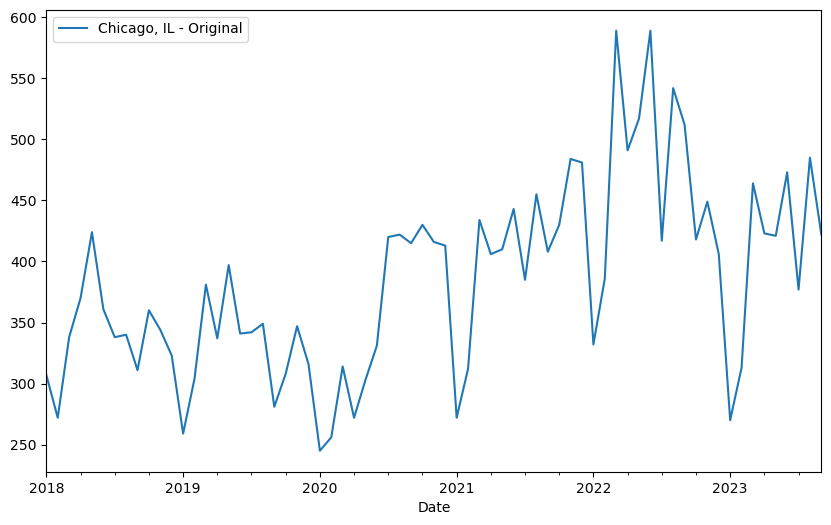

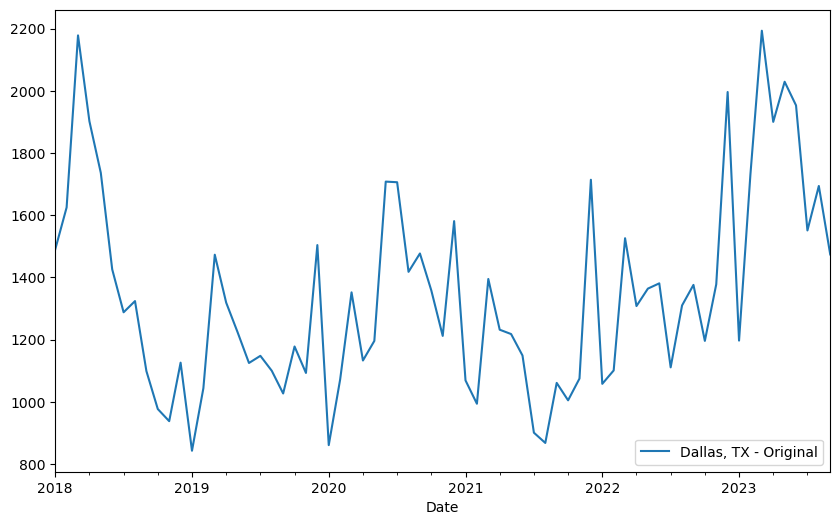

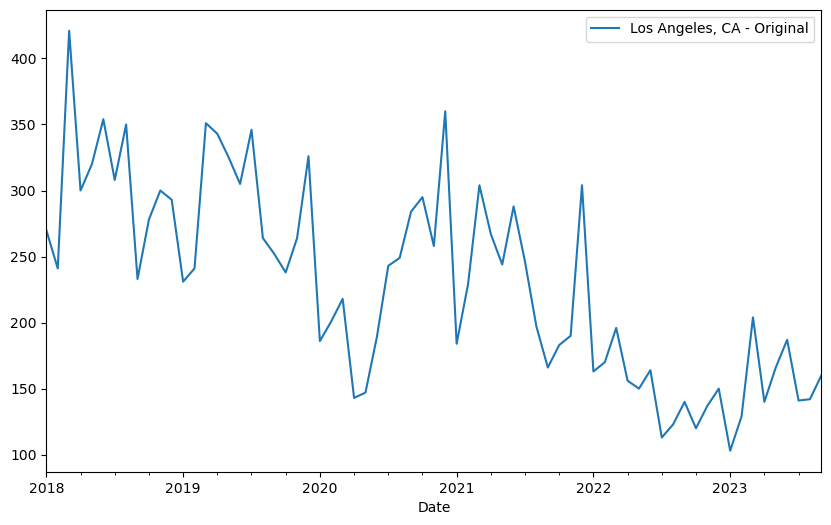

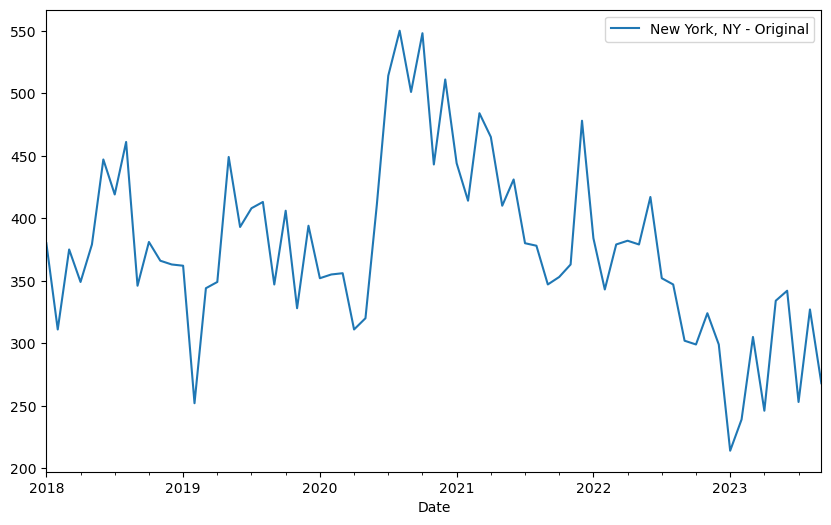

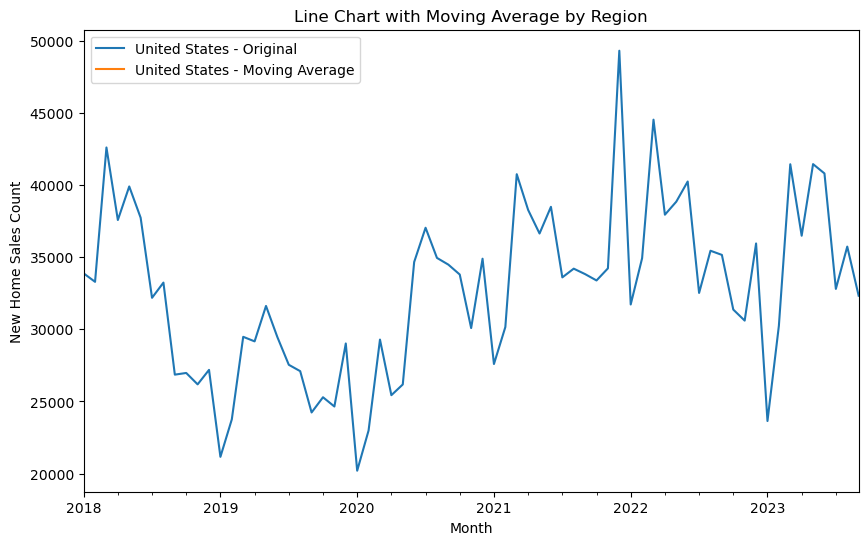

In [146]:
window_size = 3

for region, data in filtered_df.groupby('Region Name'):
    data.plot(kind='line', x='Date', y='New Home Sales Count', label=f'{region} - Original', figsize=(10, 6))
    plt.plot(data['Date'], data['Rolling Avg'], label=f'{region} - Moving Average')

    
plt.title('Line Chart with Moving Average by Region')
plt.xlabel('Month')
plt.ylabel('New Home Sales Count')
plt.legend()
plt.show()

In [147]:
rolling_avg

0              NaN
1              NaN
2     36586.666667
3     37818.666667
4     40022.000000
          ...     
64    39787.666667
65    39575.666667
66    38346.666667
67    36441.333333
68    33616.666667
Name: New Home Sales Count, Length: 69, dtype: float64